In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from pydiffmap import diffusion_map as dm

In [2]:
mat = scipy.io.loadmat('face.mat')
data = mat['Y']
print(data.shape)

(112, 92, 33)


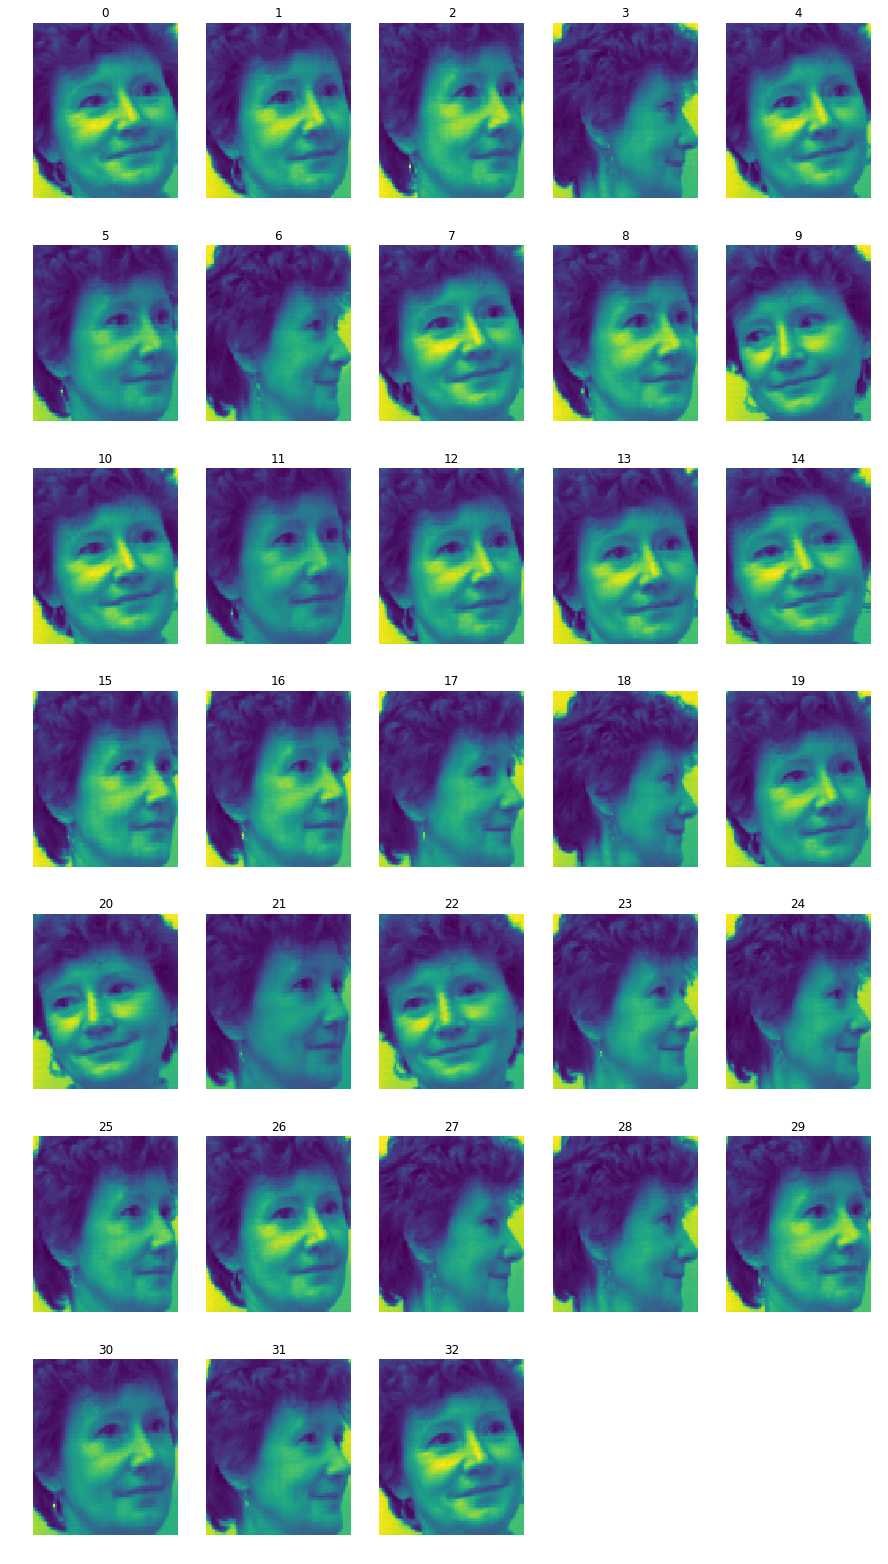

In [3]:
fig, axes = plt.subplots(7,5,figsize=(15,28)) 
for i in range(data.shape[2]):
    axis = axes[i/5, i%5]
    axis.imshow(data[:,:,i])
    axis.axis('off')
    axis.set_title(str(i))
    
axes[-1,-2].axis('off')
axes[-1,-1].axis('off')
plt.show()

In [4]:
Data = data.reshape(-1,33).T
print(Data.shape)

(33, 10304)


In [5]:
mydmap = dm.DiffusionMap.from_sklearn(n_evecs=2, k=30, alpha=1, epsilon='bgh')
dmap = mydmap.fit_transform(Data)

In [6]:
mydmap.epsilon_fitted

524287.99999999994

In [7]:
dmap

array([[ -203.18206923,  -531.73095012],
       [    4.251152  ,  -503.07019511],
       [  206.66624467,  -387.20518244],
       [ 1005.08201777,   565.05304249],
       [ -208.66119313,  -531.22011206],
       [  180.25161637,  -404.8032271 ],
       [  916.78119545,   435.07787579],
       [ -203.48211402,  -537.53173045],
       [  142.86435631,  -427.13914608],
       [-1467.65728997,   656.45644352],
       [ -218.28316247,  -524.51096014],
       [   93.44692365,  -465.09740603],
       [  -46.46321068,  -520.07918697],
       [ -100.43886551,  -523.55653035],
       [-1108.58255846,  -120.09688285],
       [  361.24219406,  -247.48544662],
       [  420.27132388,  -186.47537296],
       [  802.5813894 ,   278.56444882],
       [ 1106.19718212,   724.63542128],
       [  -74.28325878,  -521.96679032],
       [-1462.89949254,   648.80592725],
       [  491.70250972,  -111.403882  ],
       [-1408.88736916,   592.88356841],
       [  853.77191922,   349.42701262],
       [  956.02

In [8]:
index = np.argsort(dmap[:,0])
print(index)

[ 9 20 22 14 10  4  7  0 32 13 19 12  1 26 30 11  8  5  2 29 15 16 21 25
 31 17 23  6 24 28 27  3 18]


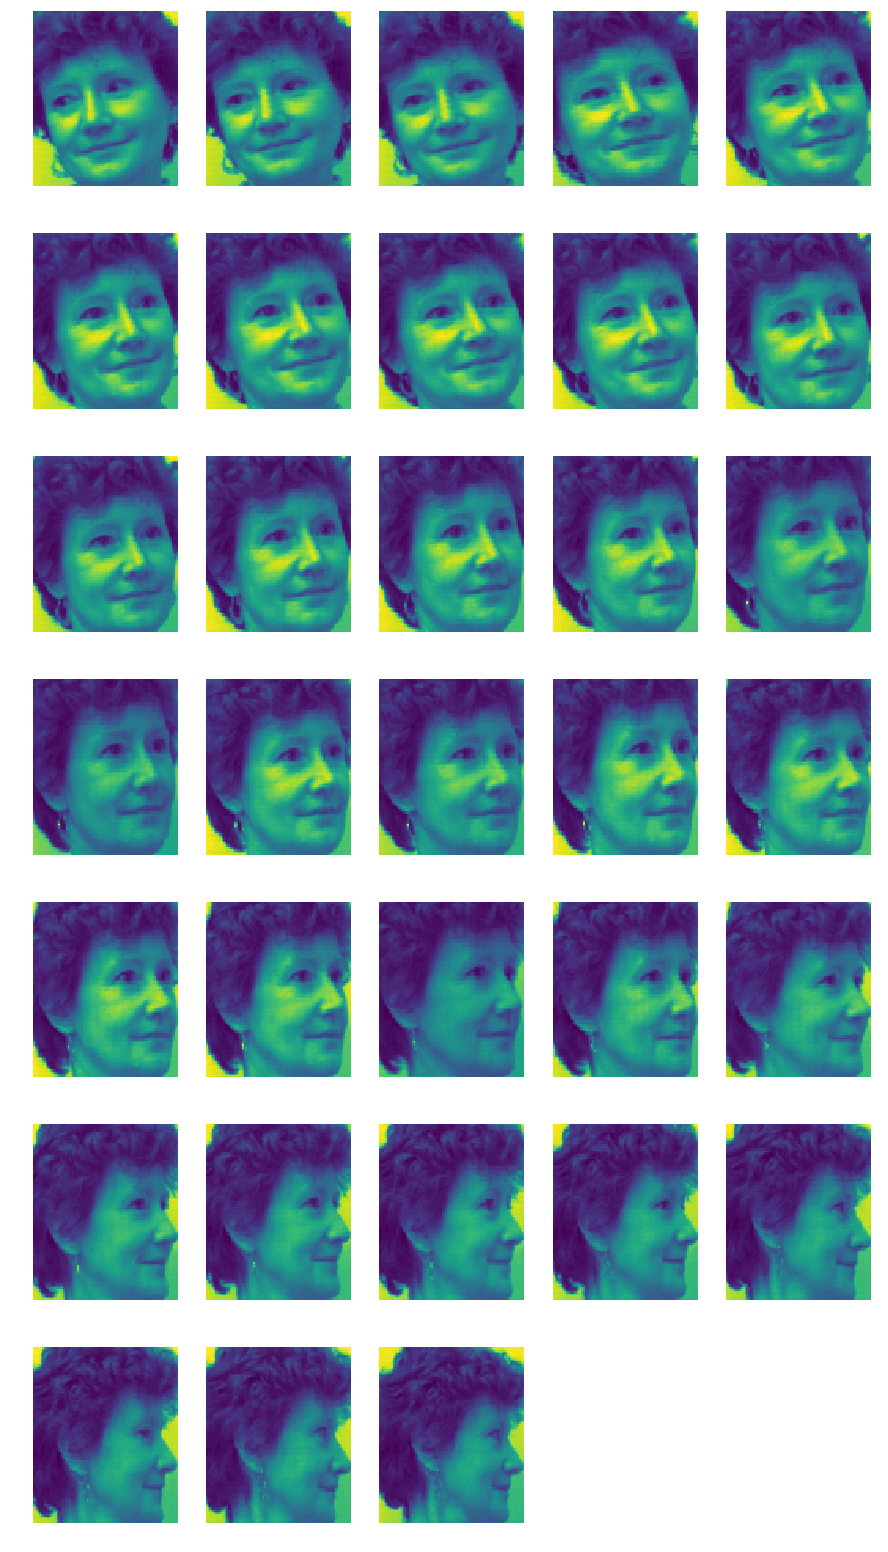

In [9]:
fig, axes = plt.subplots(7,5,figsize=(15,28)) 
for i in range(data.shape[2]):
    axis = axes[i/5, i%5]
    axis.imshow(data[:,:,index[i]])
    axis.axis('off')
axes[-1,-2].axis('off')
axes[-1,-1].axis('off')
plt.show()

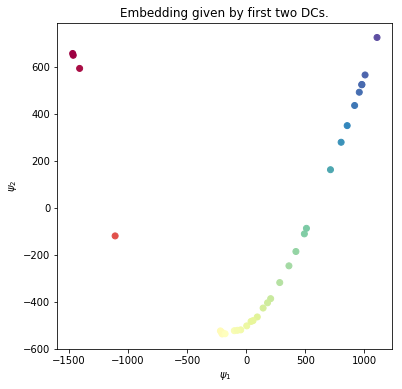

In [10]:
from pydiffmap.visualization import embedding_plot, data_plot
embedding_plot(mydmap, dim=2, scatter_kwargs = {'c': dmap[:,0], 'cmap': 'Spectral'})
#data_plot(mydmap, dim=2, scatter_kwargs = {'cmap': 'Spectral'})
plt.show()

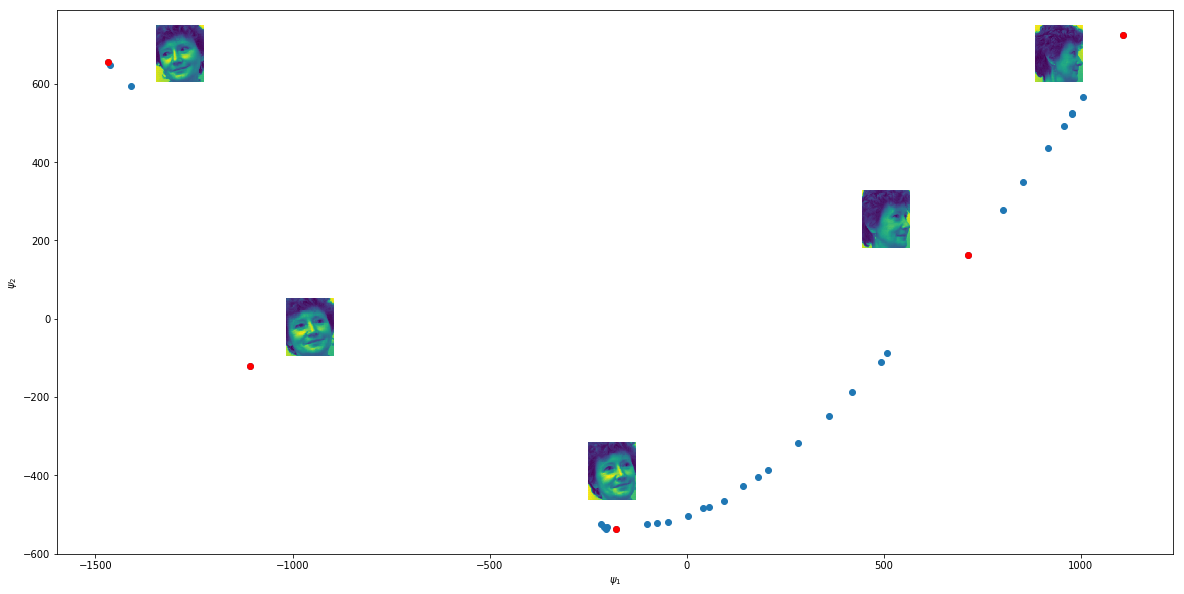

In [11]:
x = dmap[:,0]
y = dmap[:,1]
label = np.arange(x.shape[0])

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x, y)

point_list = [0,3,8,24,32]
l = 0.08
position_list = [[0.17,0.78,l,l], [0.26,0.4,l,l], [0.47,0.2,l,l], [0.66,0.55,l,l], [0.78,0.78,l,l]]
for i,p in zip(point_list, position_list):
    ax.plot(x[index[i]],y[index[i]],'ro')
    
    ax1 = plt.axes(p,frameon=True)
    ax1.imshow(data[:,:,index[i]])
    ax1.axis('off')
ax.axis('tight')
ax.set_xlabel('$\psi_1$')
ax.set_ylabel('$\psi_2$')
#ax.set_title('Embedding given by first two diffusion coordinates')
plt.savefig('embedding.png')
plt.show()

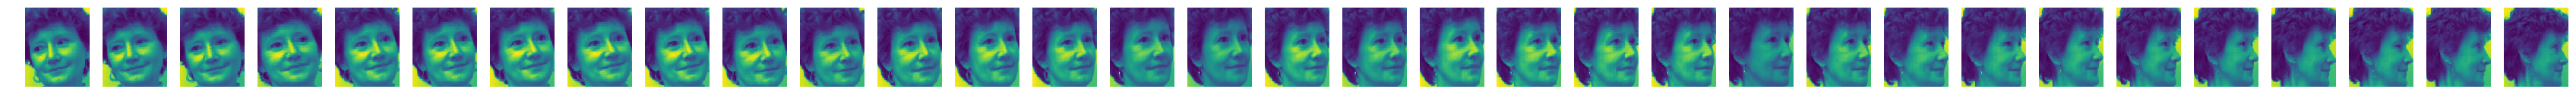

In [12]:
fig, axes = plt.subplots(1,33, figsize=(60,5)) 
for i in range(index.shape[0]):
    axis = axes[i]
    axis.imshow(data[:,:,index[i]])
    axis.axis('off')
axes[-1].axis('off')
axes[-2].axis('off')
plt.savefig('ordered_faces_t30.png')
plt.show()